In [1]:
import random

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load your data
data = np.genfromtxt('data2.csv', delimiter=',')
N, d = data.shape

In [3]:
from scipy.stats import multivariate_normal
k = 2
pi = np.array([1/k for i in range(k)])
gamma = np.array([[1/k for j in range(k)] for i in range(N)])
means = np.array([[random.uniform(min(data[:, j]), max(data[:, j])) for j in range(d)] for i in range(k)])
cov = np.array([np.diag([1 for i in range(d)]) for j in range(k)])

In [4]:
num_iterations = 1000
for p in range(num_iterations):
    # E step
    for i in range(N):
        for j in range(k):
            nominator = pi[j] * multivariate_normal.pdf(data[i], mean=means[j], cov=cov[j])
            denominator = sum([pi[_k] * multivariate_normal.pdf(data[i], mean=means[_k], cov=cov[_k]) for _k in range(k)])
            gamma[i, j] = nominator / denominator

    # M step
    for i in range(k):
        N_k = sum(gamma[:, i])
        means[i] = [1/N_k * sum([gamma[l, i] * data[l, j] for l in range(N)]) for j in range(d)]
        # cov = 1/N_k * sum([gamma[n, i] * np.subtract(np.array(data[n]), means[i]).T @ np.subtract(np.array(data[n]), means[i]) for n in range(N)])
        cov[i] = np.add(1/N_k * np.array(sum(np.array([np.array(gamma[n,i]*np.array(np.array([np.subtract(np.array(data[n]), means[i])]).T  @ np.array([np.subtract(np.array(data[n]), means[i])]))) for n in range(N)]))), np.identity(d))
        pi[i] = N_k / N

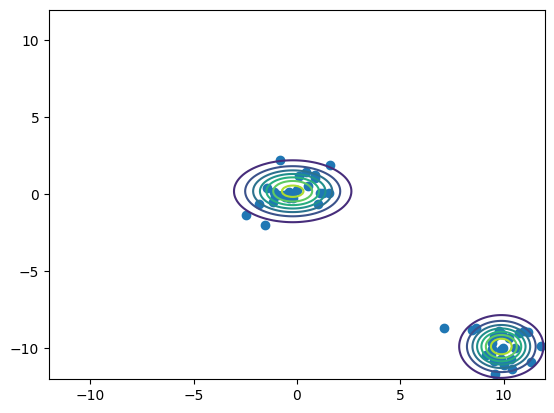

In [5]:
N    = 200
X    = np.linspace(-12, 12, N)
Y    = np.linspace(-12, 12, N)
X, Y = np.meshgrid(X, Y)
pos  = np.dstack((X, Y))
plt.figure()
for i in range(k):
    rv   = multivariate_normal(means[i], cov[i])
    Z    = rv.pdf(pos)
    plt.contour(X, Y, Z)

plt.scatter(data[:, 0], data[:, 1])
plt.show()